### Iris dataset

In [10]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# load data
iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
# Features matrix and label vector
X = iris.iloc[:,:4].values.reshape(-1,4)
y = iris.iloc[:,4].values

# Training, testing and validation split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder().fit(y_temp)
y_temp2 = le.transform(y_temp)
y_temp_enc = tf.keras.utils.to_categorical(y_temp2)
y_test_temp = le.transform(y_test)
y_test_enc = tf.keras.utils.to_categorical(y_test_temp)

X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_temp, y_temp_enc, test_size=0.2, random_state=42)

print("The training set contains: ", X_train.shape, y_train.shape)
print("The validation set contains: ", X_val.shape, y_test.shape)
print("The testing set contains: ", X_test.shape, y_test.shape)
print(X_train.shape[1:])


The training set contains:  (96, 4) (96,)
The validation set contains:  (24, 4) (30,)
The testing set contains:  (30, 4) (30,)
(4,)


In [12]:
model = Sequential([
    keras.layers.Input(shape=X_train.shape[1:]), # Input layer
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(3, activation="softmax") # Ouput layer
])

model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train_enc, epochs=250, verbose=1, validation_data=(X_val, y_val_enc))

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.3034 - loss: 4.1966 - val_accuracy: 0.3333 - val_loss: 3.4971
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3268 - loss: 3.8430 - val_accuracy: 0.3333 - val_loss: 3.3025
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3268 - loss: 3.5769 - val_accuracy: 0.3333 - val_loss: 3.1311
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3151 - loss: 3.5587 - val_accuracy: 0.3333 - val_loss: 2.9776
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3229 - loss: 3.3008 - val_accuracy: 0.3333 - val_loss: 2.8333
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3776 - loss: 2.8666 - val_accuracy: 0.3333 - val_loss: 2.6935
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3542 - loss: 2.8065 - val_accuracy: 0.3333 - val_loss: 2.5552
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3346 - loss: 2.7998 - val_accuracy: 0.3333 - val_loss

Epoch 52/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7031 - loss: 0.7662 - val_accuracy: 0.5417 - val_loss: 0.8178
Epoch 53/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6875 - loss: 0.7536 - val_accuracy: 0.5417 - val_loss: 0.8122
Epoch 54/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6758 - loss: 0.7647 - val_accuracy: 0.5417 - val_loss: 0.8071
Epoch 55/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6758 - loss: 0.7593 - val_accuracy: 0.5417 - val_loss: 0.8020
Epoch 56/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6797 - loss: 0.7559 - val_accuracy: 0.5417 - val_loss: 0.7971
Epoch 57/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7031 - loss: 0.7433 - val_accuracy: 0.5417 - val_loss: 0.7921
Epoch 58/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6719 - loss: 0.7386 - val_accuracy: 0.5417 - val_loss: 0.7871
Epoch 59/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6758 - loss: 0.7362 - val_accuracy: 0.5417 - v

Epoch 103/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7005 - loss: 0.5405 - val_accuracy: 0.5417 - val_loss: 0.6102
Epoch 104/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7005 - loss: 0.5436 - val_accuracy: 0.5417 - val_loss: 0.6063
Epoch 105/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6576 - loss: 0.5639 - val_accuracy: 0.5417 - val_loss: 0.6024
Epoch 106/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6966 - loss: 0.5254 - val_accuracy: 0.5833 - val_loss: 0.5987
Epoch 107/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6927 - loss: 0.5318 - val_accuracy: 0.5833 - val_loss: 0.5949
Epoch 108/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6927 - loss: 0.5371 - val_accuracy: 0.5833 - val_loss: 0.5914
Epoch 109/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6927 - loss: 0.5400 - val_accuracy: 0.5833 - val_loss: 0.5882
Epoch 110/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6536 - loss: 0.5438 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8138 - loss: 0.4624 - val_accuracy: 0.6667 - val_loss: 0.4947
Epoch 154/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8099 - loss: 0.4637 - val_accuracy: 0.6667 - val_loss: 0.4929
Epoch 155/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8164 - loss: 0.4653 - val_accuracy: 0.6667 - val_loss: 0.4909
Epoch 156/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8581 - loss: 0.4310 - val_accuracy: 0.6667 - val_loss: 0.4900
Epoch 157/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8659 - loss: 0.4648 - val_accuracy: 0.6667 - val_loss: 0.4888
Epoch 158/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8424 - loss: 0.4690 - val_accuracy: 0.6667 - val_loss: 0.4875
Epoch 159/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8997 - loss: 0.4362 - val_accuracy: 0.6667 - val_loss: 0.4859
Epoch 160/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8958 - loss: 0.4288 - val_accuracy: 0.6667 - val_los

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9557 - loss: 0.3635 - val_accuracy: 0.8750 - val_loss: 0.4332
Epoch 204/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9284 - loss: 0.3735 - val_accuracy: 0.8750 - val_loss: 0.4317
Epoch 205/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9401 - loss: 0.3697 - val_accuracy: 0.8750 - val_loss: 0.4301
Epoch 206/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9596 - loss: 0.3673 - val_accuracy: 0.8750 - val_loss: 0.4297
Epoch 207/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9258 - loss: 0.3650 - val_accuracy: 0.8750 - val_loss: 0.4271
Epoch 208/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9297 - loss: 0.3706 - val_accuracy: 0.8750 - val_loss: 0.4262
Epoch 209/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9258 - loss: 0.3808 - val_accuracy: 0.8750 - val_loss: 0.4244
Epoch 210/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9375 - loss: 0.3624 - val_accuracy: 0.8750 - val_los

In [14]:
## Predicting testing set
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[7.61123467e-03, 4.82291996e-01, 5.10096788e-01],
       [9.96056974e-01, 2.84713972e-03, 1.09583139e-03],
       [3.08975053e-04, 2.40024775e-01, 7.59666264e-01],
       [9.64014418e-03, 5.18647611e-01, 4.71712142e-01],
       [1.02428105e-02, 5.62509894e-01, 4.27247316e-01],
       [9.95508909e-01, 3.20368726e-03, 1.28742075e-03],
       [4.87246662e-02, 6.74305677e-01, 2.76969582e-01],
       [4.09259927e-03, 4.88621086e-01, 5.07286310e-01],
       [8.74531083e-03, 4.95758325e-01, 4.95496452e-01],
       [3.10194641e-02, 6.32040739e-01, 3.36939842e-01],
       [3.44485673e-03, 4.40712333e-01, 5.55842876e-01],
       [9.90069687e-01, 6.84506167e-03, 3.08526959e-03],
       [9.98044908e-01, 1.38686888e-03, 5.68126969e-04],
       [9.89152730e-01, 7.52169779e-03, 3.32543696e-03],
       [9.95466232e-01, 3.19677475e-03, 1.33692473e-03],
       [9.00145341e-03, 5.41238070e-01, 4.49760437e-01],
       [6.58306002e-04, 2.64948785e-01, 7.34392762e-01],
       [2.59002671e-02, 5.92985

Accuracy:  0.9


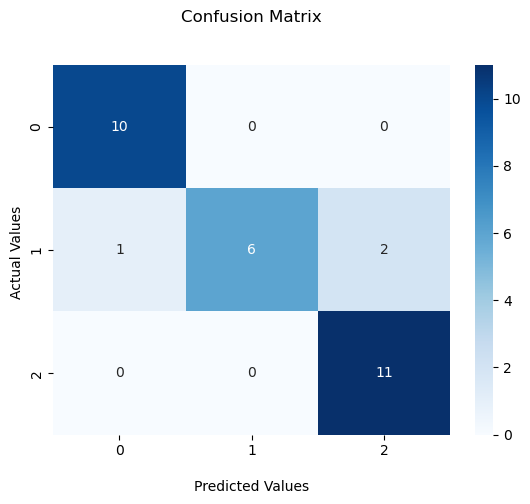

In [17]:
# Convert to classes
y_pred_class = np.around(y_pred)

# Accuracy
acc = accuracy_score(y_test_enc, y_pred_class)
print("Accuracy: ", acc)

# Confusion matrix
plt.figure()
cm = confusion_matrix(np.argmax(y_test_enc, axis=1), np.argmax(y_pred_class, axis=1))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()